# Step 1: Choose a Binary Classification Dataset

#### We are using the Breast Cancer Wisconsin Dataset from Kaggle, where:
#### diagnosis is the target variable

#### diagnosis is the target variable

#### M = Malignant (1)

#### B = Benign (0)

#  Step 2: Train/Test Split & Standardize Features

In [22]:
# Load the CSV dataset
import pandas as pd
df = pd.read_csv(r"D:/dataset/breast-cancer-wisconsin-data.zip")


## Drop irrelevant columns

In [23]:
df.drop(['id', 'Unnamed: 32'], axis=1, inplace=True, errors='ignore')

## Convert target to binary

In [24]:
df['diagnosis'] = df['diagnosis'].map({'M': 1, 'B': 0})

## Features and target

In [25]:
X = df.drop('diagnosis', axis=1)
y = df['diagnosis']

## Train-test split

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)


## Standardize features

In [27]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 3: Fit a Logistic Regression Model

In [28]:
from sklearn.linear_model import LogisticRegression

# Train model
model = LogisticRegression(max_iter=1000)
model.fit(X_train_scaled, y_train)

LogisticRegression(max_iter=1000)

## Predict

In [29]:
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]

# Step 4: Evaluate with Confusion Matrix, Precision, Recall, ROC-AUC

In [30]:
from sklearn.metrics import (confusion_matrix, classification_report, accuracy_score, roc_auc_score, roc_curve)
import seaborn as sns
import matplotlib.pyplot as plt

## Confusion Matrix

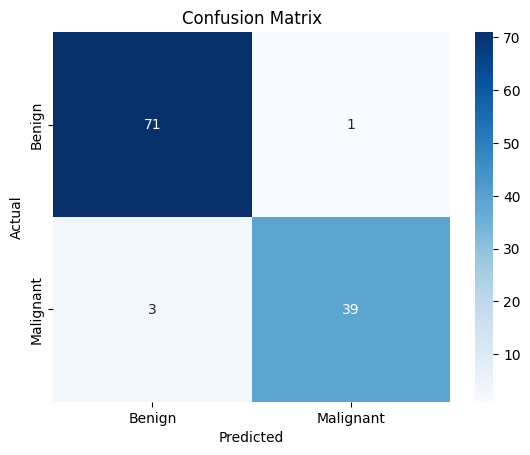

In [31]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Benign', 'Malignant'], yticklabels=['Benign', 'Malignant'])
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [32]:
# Classification Report
print("Classification Report:\n", classification_report(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.99      0.97        72
           1       0.97      0.93      0.95        42

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



## ROC Curve and AUC

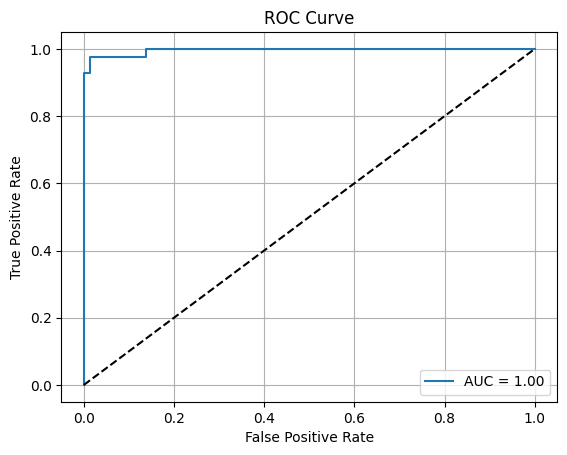

In [33]:
fpr, tpr, thresholds = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc_score(y_test, y_prob):.2f}")
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.grid(True)
plt.show()

## Accuracy & AUC

In [34]:
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))

Accuracy: 0.9649122807017544
ROC AUC Score: 0.996031746031746


# Step 5: Tune Threshold & Explain Sigmoid Function

##  Change Threshold:

In [35]:
# Custom threshold example
threshold = 0.3
y_custom_pred = (y_prob >= threshold).astype(int)

In [36]:
# Re-evaluate
print(f"\nCustom Threshold: {threshold}")
print(confusion_matrix(y_test, y_custom_pred))
print(classification_report(y_test, y_custom_pred))


Custom Threshold: 0.3
[[71  1]
 [ 1 41]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99        72
           1       0.98      0.98      0.98        42

    accuracy                           0.98       114
   macro avg       0.98      0.98      0.98       114
weighted avg       0.98      0.98      0.98       114



## Sigmoid Function:

In [37]:
import numpy as np

# Sigmoid function definition
def sigmoid(z):
    return 1 / (1 + np.exp(-z))


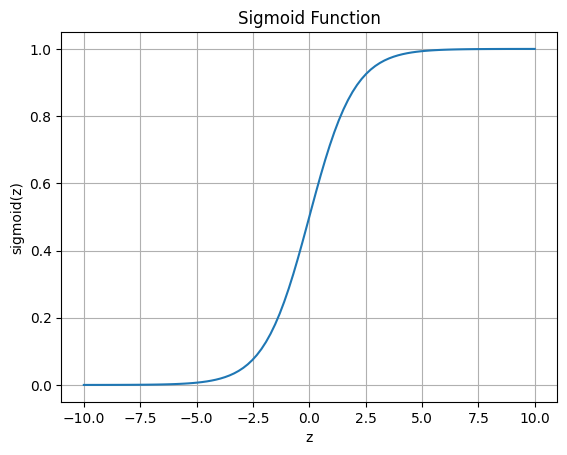

In [39]:
# Plot sigmoid curve
z = np.linspace(-10, 10, 100)
plt.plot(z, sigmoid(z))
plt.title("Sigmoid Function")
plt.xlabel("z")
plt.ylabel("sigmoid(z)")
plt.grid(True)
plt.show()